## Pair Programming - Regresión logística 3 y 4

### Ajuste y Métricas

---

In [47]:
# Tratamiento de los datos
import pandas as pd
import numpy as np

# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Testing
from sklearn.model_selection import train_test_split

#  Modelado, matriz de confusión y métricas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')


In [48]:
df = pd.read_csv('../archivos/travel_balanceado_sin_dupl.csv', index_col=0)
df.head(2)

,product_name,net_sales,commision_(in_value),continent,cat_age,cat_duration,net_sales_stand,commision_(in_value)_stand,agency_ADM,agency_ART,...,agency_TST,agency_TTW,agency_type_Airlines,agency_type_Travel Agency,distribution_channel_Offline,distribution_channel_Online,gender_F,gender_M,gender_PNS,claim
0,14,21.0,0.0,6,6,5,-0.431903,-0.516562,0,0,...,0,0,0,1,0,1,0,0,1,0
1,9,20.0,0.0,6,6,8,-0.451726,-0.516562,0,0,...,0,0,0,1,0,1,0,0,1,0


In [49]:
df_2 = pd.read_csv('../archivos/travel_enco_stand_sin_balanceo.csv', index_col=0)
df_2.head(2)

,product_name,claim,net_sales,commision_(in_value),continent,cat_age,cat_duration,net_sales_stand,commision_(in_value)_stand,agency_ADM,...,agency_SSI,agency_TST,agency_TTW,agency_type_Airlines,agency_type_Travel Agency,distribution_channel_Offline,distribution_channel_Online,gender_F,gender_M,gender_PNS
0,3,0,-29.0,9.57,6,3,5,-1.423021,-0.053718,0,...,0,0,0,0,1,1,0,1,0,0
1,3,0,-29.0,9.57,6,3,5,-1.423021,-0.053718,0,...,0,0,0,0,1,1,0,1,0,0


Es el momento de realizar el ajuste de vuestro modelo, en este caso tendréis que usar el csv que guardastéis ayer después de todo el preprocesamiento. Los objetivos de esta lección son:
- Realizar el ajuste o ajustes de los modelos
- Sacad la matriz de confusión de vuestro modelo e identificad cuáles son los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

### 1. Modelo con las variables predictoras ESTANDARIZADAS y la variable respuesta BALANCEADA

In [50]:
df_stand_bal = df.drop(['net_sales', 'commision_(in_value)'], axis= 1)

In [51]:
#Separamos los datos

X1 = df_stand_bal.drop("claim", axis = 1)
y1 = df_stand_bal["claim"]

In [52]:
X1.head(2)

,product_name,continent,cat_age,cat_duration,net_sales_stand,commision_(in_value)_stand,agency_ADM,agency_ART,agency_C2B,agency_CBH,...,agency_SSI,agency_TST,agency_TTW,agency_type_Airlines,agency_type_Travel Agency,distribution_channel_Offline,distribution_channel_Online,gender_F,gender_M,gender_PNS
0,14,6,6,5,-0.431903,-0.516562,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
1,9,6,6,8,-0.451726,-0.516562,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1


In [53]:
y1.head(2)

0    0
1    0
Name: claim, dtype: int64

In [54]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

### Ajuste de nuestro modelo

In [55]:
#Usamos el método para realizar la regresión logística, lo ajustamos y sacamos las predicciones

log_reg_esta = LogisticRegression(n_jobs=-1, max_iter = 1000)


log_reg_esta.fit(x_train1,y_train1)


y_pred_train_esta = log_reg_esta.predict(x_train1)
y_pred_test_esta = log_reg_esta.predict(x_test1)

In [56]:
train_df_esta = pd.DataFrame({'Real': y_train1, 'Predicted': y_pred_train_esta, 'Set': ['Train']*len(y_train1)})
test_df_esta  = pd.DataFrame({'Real': y_test1,  'Predicted': y_pred_test_esta,  'Set': ['Test']*len(y_test1)})
resultados = pd.concat([train_df_esta,test_df_esta], axis = 0)
resultados.head()

,Real,Predicted,Set
30849,0,0,Train
51322,1,0,Train
41678,1,1,Train
20462,0,0,Train
45387,1,1,Train


### Matriz de Confusión

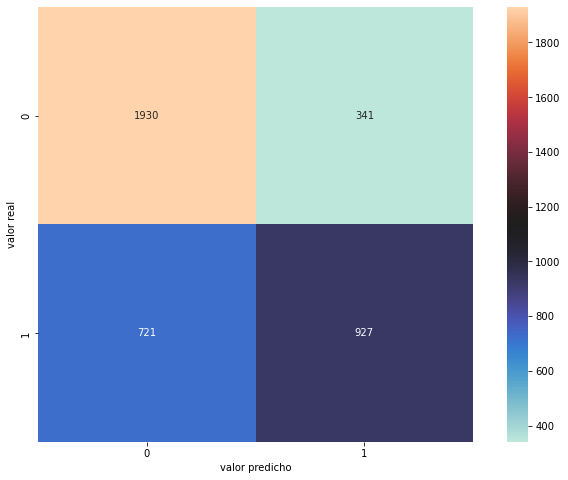

In [57]:
mat_lr1 = confusion_matrix(y_test1, y_pred_test_esta)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr1, square=True, annot=True, fmt="d", cmap = "icefire")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

➡️ **_Conclusiones:_**

0: No reclaman el seguro

1: Si reclaman

- VP: El número 1930, corresponde al número de personas que si reclaman y si hemos acertado.
- VN: El número 927, corresponde al número de personas que no reclaman y si hemos acertado.
- FN: El número 721, corresponde al número de personas que si han reclamado y no hemos predicho. (Error de tipo II)
- FP: El número 341, corresponde al número de personas que no reclaman y hemos dicho que si. (Error de tipo I)

In [58]:
# Sacamos las métricas

def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kappa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [59]:
resultados_logistic_stand_bal = metricas(y_test1, y_pred_test_esta, y_train1, y_pred_train_esta, "Regresión logistica Stan_Bal")
resultados_logistic_stand_bal

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.729013,0.731073,0.56250,0.635802,0.425813,test,Regresión logistica Stan_Bal
1,0.733031,0.749612,0.57183,0.648762,0.439668,train,Regresión logistica Stan_Bal


➡️ **_Conclusiones:_**

Vemos que tenemos: 
- un accuracy y precision altos.
- un f1 considerablemente alto aunque mejorable.
- un kappa que nos indica que tenemos más de la mitad de prediciones aleatorias.

Nos interesaría subir el recall ya que en nuestro caso nos interesa tener más posibilidad de error con los FN, las personas que no reclaman y no hemos predicho.



### 2. Módelo con las variables predictoras SIN ESTANDARIZAR y la variable respuesta SIN BALANCEAR

In [60]:
df_sin_stand_sin_bal = df_2.drop(['net_sales_stand', 'commision_(in_value)_stand'], axis= 1)

In [61]:
X2 = df_sin_stand_sin_bal.drop("claim", axis = 1)
y2 = df_sin_stand_sin_bal["claim"]

In [62]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [63]:
log_reg_esta2 = LogisticRegression(n_jobs=-1, max_iter = 2000)

log_reg_esta2.fit(x_train2,y_train2)


y_pred_train_esta2 = log_reg_esta2.predict(x_train2)
y_pred_test_esta2 = log_reg_esta2.predict(x_test2)

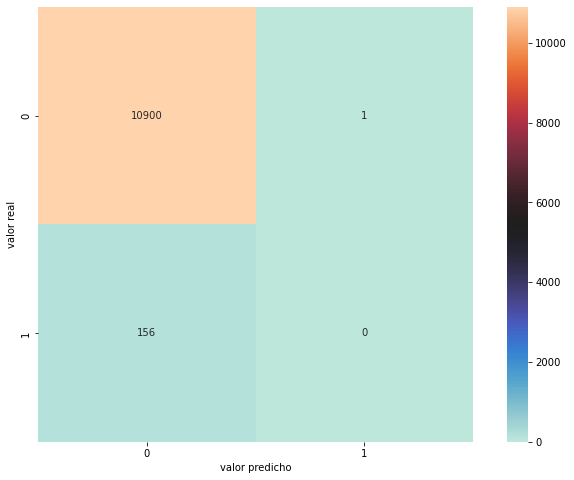

In [64]:
mat_lr_esta2 = confusion_matrix(y_test2, y_pred_test_esta2)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr_esta2, square=True, annot=True, fmt="d", cmap = "icefire")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

In [65]:
results_logistic_sin_stand_bal = metricas(y_test2, y_pred_test_esta2, y_train2, y_pred_train_esta2, "Regresión logistica Sin Stan-Bal")
results_logistic_sin_stand_bal

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.985801,0.0,0.0,0.0,-0.000180,test,Regresión logistica Sin Stan-Bal
1,0.982635,0.0,0.0,0.0,-0.000135,train,Regresión logistica Sin Stan-Bal


### 3. Módelo con las variables predictoras SIN ESTANDARIZAR y la variable respuesta BALANCEADA

In [66]:
df_sin_stand_con_bal = df.drop(['net_sales_stand', 'commision_(in_value)_stand'], axis= 1)

In [67]:
X3 = df_sin_stand_con_bal.drop("claim", axis = 1)
y3 = df_sin_stand_con_bal["claim"]

In [68]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.2, random_state = 42)

In [69]:
log_reg_esta3 = LogisticRegression(n_jobs=-1, max_iter = 3000)

log_reg_esta3.fit(x_train3,y_train3)


y_pred_train_esta3 = log_reg_esta3.predict(x_train3)
y_pred_test_esta3 = log_reg_esta3.predict(x_test3)

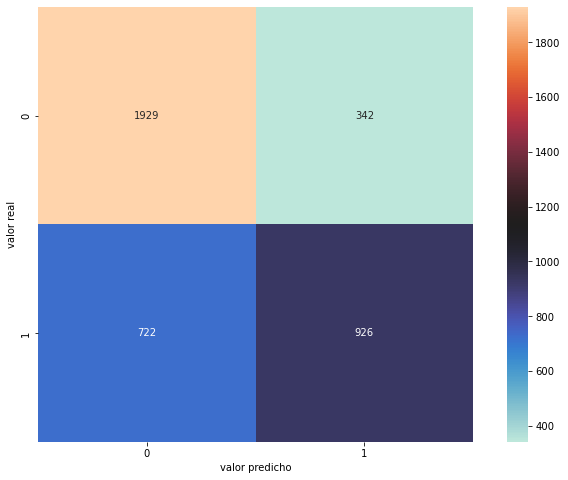

In [70]:
mat_lr_esta3 = confusion_matrix(y_test3, y_pred_test_esta3)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr_esta3, square=True, annot=True, fmt="d", cmap = "icefire")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

In [71]:
results_logistic_sin_stand_con_bal = metricas(y_test3, y_pred_test_esta3, y_train3, y_pred_train_esta3, "Regresión logistica Sin Stan Con Bal")
results_logistic_sin_stand_con_bal

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.728502,0.730284,0.561893,0.635117,0.424732,test,Regresión logistica Sin Stan Con Bal
1,0.732712,0.749660,0.570647,0.648017,0.438885,train,Regresión logistica Sin Stan Con Bal


### 4. Modelo con las variables predictoras ESTANDARIZADAS y la variable respuesta SIN BALANCEAR


In [72]:
df_stand_sin_bal = df_2.drop(['net_sales', 'commision_(in_value)'], axis= 1)

In [73]:
X4 = df_stand_sin_bal.drop("claim", axis = 1)
y4 = df_stand_sin_bal["claim"]

In [74]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size = 0.2, random_state = 42)

In [75]:
log_reg_esta4 = LogisticRegression(n_jobs=-1, max_iter = 3000)

log_reg_esta4.fit(x_train4,y_train4)

y_pred_train_esta4 = log_reg_esta4.predict(x_train4)
y_pred_test_esta4 = log_reg_esta4.predict(x_test4)

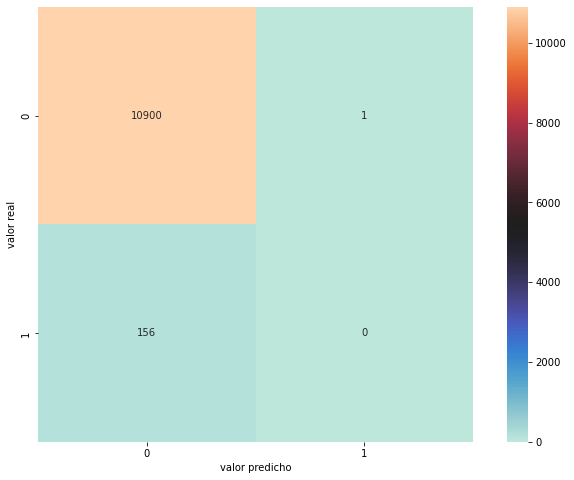

In [76]:
mat_lr_esta4 = confusion_matrix(y_test4, y_pred_test_esta4)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr_esta4, square=True, annot=True, fmt="d", cmap = "icefire")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

In [77]:
results_logistic_con_stand_sin_bal = metricas(y_test4, y_pred_test_esta4, y_train4, y_pred_train_esta4, "Regresión logistica Con Stan Sin Bal")
results_logistic_con_stand_sin_bal

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.985801,0.0,0.0,0.0,-0.000180,test,Regresión logistica Con Stan Sin Bal
1,0.982635,0.0,0.0,0.0,-0.000135,train,Regresión logistica Con Stan Sin Bal


### 5. Unimos todas las métricas

In [78]:
resultados_todo = pd.concat([resultados_logistic_stand_bal, results_logistic_sin_stand_bal, results_logistic_sin_stand_con_bal, results_logistic_con_stand_sin_bal], axis = 0)
resultados_todo

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.729013,0.731073,0.562500,0.635802,0.425813,test,Regresión logistica Stan_Bal
1,0.733031,0.749612,0.571830,0.648762,0.439668,train,Regresión logistica Stan_Bal
0,0.985801,0.000000,0.000000,0.000000,-0.000180,test,Regresión logistica Sin Stan-Bal
1,0.982635,0.000000,0.000000,0.000000,-0.000135,train,Regresión logistica Sin Stan-Bal
0,0.728502,0.730284,0.561893,0.635117,0.424732,test,Regresión logistica Sin Stan Con Bal
1,0.732712,0.749660,0.570647,0.648017,0.438885,train,Regresión logistica Sin Stan Con Bal
0,0.985801,0.000000,0.000000,0.000000,-0.000180,test,Regresión logistica Con Stan Sin Bal
1,0.982635,0.000000,0.000000,0.000000,-0.000135,train,Regresión logistica Con Stan Sin Bal


➡️ **_Conclusiones:_**

- El segundo, sin estandarizar y sin balancear, y el cuarto caso, con estandarización y sin balanceo, son muy similares y fracaso absoluto, al tener un Kappa negativo.

- El primer y tercer modelo vemos que son los más acertados, dentro de que no son precisos, ya que tienen un kappa de 0.43.

- Estos modelos, el primero y el tercero, son los que están con la variable respuesta balanceada y las variables predictoras numéricas están en uno de los casos estandarizadas y en el otro sin estandarizar. Aunque dan mejor resultados no son buenos modelos ya que su Kappa es bastante bajo.



In [79]:
resultados_todo.to_csv("../archivos/resultados_travel_logistica.csv")